# SARS-CoV-2 and MERS-CoV Mpro retrospective validation plots

Plotting the results of performing the retrospectove validation between SARS-CoV-2 and MERS-CoV. The data is obtained via the pipeline introduced in the paper and included in the `/data` folder.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.plot_results import plot_affinity_compare, plot_score_correlation, exp_and_pred_affinity, get_roc_curve

## Plot correlation between predicted and experimental affinities
We import the experimental IC50s from the `mers_ic50s.csv` and `sars_ic50s.csv` files in `data`, as well as the predicted scores.

In [135]:
mers_ic50 = pd.read_csv("data/mers_ic50s.csv")
sars_ic50 = pd.read_csv("data/sars_ic50s.csv")

mers_pred = pd.read_csv("/Users/castelm3/Documents/Github/asapdiscovery_orig/local/sars_mers_gen_validation/mers_all_scores_smi.csv")
#mers_pred= pd.read_csv("data/mers_predicted_scores_cdock2.csv")
mers_pred.rename(columns={'CNNaffinity':'CNN_dock_affinity'}, inplace=True)
sars_pred = pd.read_csv("/Users/castelm3/Documents/Github/asapdiscovery_orig/local/sars_mers_gen_validation/sars_all_scores_smi.csv")
#sars_pred = pd.read_csv("data/sars_predicted_scores_cdock2.csv")
sars_pred.rename(columns={'CNNaffinity':'CNN_dock_affinity'}, inplace=True)

mers_all = mers_pred.merge(mers_ic50[['lig-ID','Minh pIC50']], how = 'inner', on = ['lig-ID'])
mers_all = mers_all.reset_index(drop=True)
sars_all = sars_pred.merge(sars_ic50[['lig-ID','IC50 lower (µM)']], how = 'inner', on = ['lig-ID'])
sars_all = sars_all.reset_index(drop=True)

In [136]:
len(mers_pred), len(sars_pred), len(mers_all), len(sars_all)

(351, 1004, 351, 1004)

In [137]:
df_mers_aff = mers_all.copy()
df_mers_aff["Affinity (kcal/mol)"] = np.log(10 ** (-df_mers_aff['Minh pIC50'])) * 0.5922
df_mers_aff = df_mers_aff.rename(columns={"Minh pIC50": "pIC50"})

df_sars_aff = sars_all.copy()
df_sars_aff["pIC50"] = df_sars_aff['IC50 lower (µM)'].apply(lambda x: -np.log10(x * 10 ** (-6)))
df_sars_aff["Affinity (kcal/mol)"] = np.log(10 ** (-df_sars_aff['IC50 lower (µM)'])) * 0.5922

### Correlation between scores

/Users/castelm3/Documents/Github/broad-spectrum-asap-paper/scripts/plot_results.py:749: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(x=x_labels, y=y_values, ax=ax, errorbar=None, palette=colors)
/Users/castelm3/Documents/Github/broad-spectrum-asap-paper/scripts/plot_results.py:749: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(x=x_labels, y=y_values, ax=ax, errorbar=None, palette=colors)


[0.02714168617232315, 0.0386704420633838, 0.05105733869900611, 0.05105336280168807]
[0.012986779180683639, 0.017423470282511358, 0.028718746646975612, 0.0314758746356028]


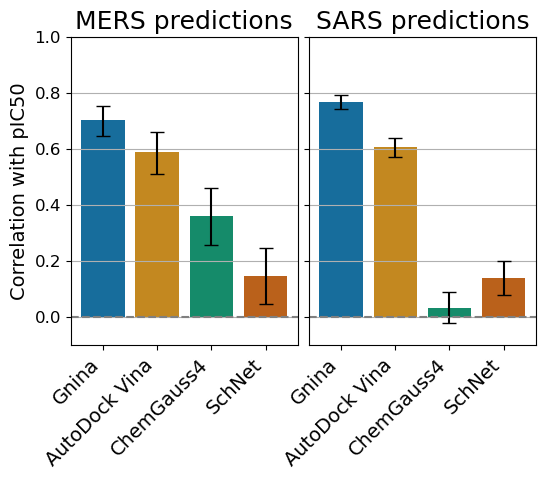

In [138]:
# MERS 
# df_mers_aff = exp_and_pred_affinity(mers_ic50, mers_pred, 'Minh pIC50', 'CNN_dock_affinity', 5)
# df_mers_aff.reset_index(drop=True, inplace=True)
df_mers_aff["gnina-pIC50"] = -np.log10(
            np.exp(-df_mers_aff['CNN_dock_affinity'] / 0.5922)
        )
df_mers_aff["vina-pIC50"] = -np.log10(
            np.exp(df_mers_aff['Vina-score-min'] / 0.5922)
        )
df_mers_aff["chemg-pIC50"] = -np.log10(
            np.exp(df_mers_aff["docking-score-POSIT"] / 0.5922)
        )
df_mers_aff_pred = df_mers_aff[['gnina-pIC50', 'vina-pIC50', 'chemg-pIC50', 'pIC50', 'computed-SchNet-pIC50',]] 
df_mers_aff_pred = df_mers_aff_pred.dropna().reset_index(drop=True)

df_mers_aff_pred = df_mers_aff_pred.rename(columns={'chemg-pIC50': 'ChemGauss4', 
                                                    'vina-pIC50': 'AutoDock Vina', 
                                                    'computed-SchNet-pIC50': 'SchNet',
                                                    'gnina-pIC50': 'Gnina'})

# SARS 
#df_sars_aff = exp_and_pred_affinity(sars_ic50, sars_pred, 'IC50 lower (µM)', 'CNN_dock_affinity', 5)
#df_sars_aff.reset_index(drop=True, inplace=True)
df_sars_aff["gnina-pIC50"] = -np.log10(
            np.exp(-df_sars_aff['CNN_dock_affinity'] / 0.5922)
        )
df_sars_aff["vina-pIC50"] = -np.log10(
            np.exp(df_sars_aff['Vina-score-min'] / 0.5922)
        )
df_sars_aff["chemg-pIC50"] = -np.log10(
            np.exp(df_sars_aff["docking-score-POSIT"] / 0.5922)
        )
df_sars_aff_pred = df_sars_aff[['gnina-pIC50', 'vina-pIC50', 'chemg-pIC50', 'pIC50', 'computed-SchNet-pIC50',]]
df_sars_aff_pred = df_sars_aff_pred.dropna().reset_index(drop=True)
df_sars_aff_pred = df_sars_aff_pred.rename(columns={'chemg-pIC50': 'ChemGauss4', 
                                                    'vina-pIC50': 'AutoDock Vina',                                                   
                                                    'gnina-pIC50': 'Gnina','computed-SchNet-pIC50': 'SchNet',})

# Plotting affinity correlation
fig, axs = plt.subplots(1, 2, figsize=(6,4), sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0)
fig_mers, ax1 = plot_score_correlation(df_mers_aff_pred, 'blast-descriptor', 'pIC50', 'MERS predictions', [-0.1, 1.], 
                                      'pIC50', 'Normalized scores', type='bars', ax=axs[0], color_palette='colorblind')

fig_mers, ax2 = plot_score_correlation(df_sars_aff_pred, 'blast-descriptor', 'pIC50', 'SARS predictions', [-0.1, 1.], 
                                       'pIC50', 'Normalized scores', type='bars', ax=axs[1],  color_palette='colorblind')
#fig.savefig("/Users/castelm3/Documents/Github/asapdiscovery_orig/local/sars_mers_gen_validation/correlation_lt.pdf", bbox_inches='tight')

### Honest Significant Difference between correlation stats

In [109]:
import pandas as pd
from sklearn.metrics import r2_score, root_mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import itertools
from glob import glob
from scipy.stats import f_oneway
import warnings
from scipy.stats import ttest_rel
import numpy as np

In [110]:
def calculate_stats(x, y):
    # calculate correlation stats
    from cinnabar import stats
    from scipy.stats import pearsonr, spearmanr

    rmse = stats.bootstrap_statistic(x, y, statistic="RMSE")
    r2 = stats.bootstrap_statistic(x, y, statistic="R2")
    ktau = stats.bootstrap_statistic(x, y, statistic="KTAU") 
    pearson = np.round(pearsonr(x, y)[0], 5)
    spearman = np.round(spearmanr(x, y)[0], 5)

    return rmse, r2, ktau, pearson, spearman


In [51]:
import statsmodels as sm

rmse_values = {}
r2_values = {}
ktau_values = {}
spearman_values = {}
for score in ['CNN_dock_affinity', 'Vina-score-min', 'docking-score-POSIT']:
    df_scores = exp_and_pred_affinity(mers_ic50, mers_pred, 'Minh pIC50', score, 5)
    rmse, r2, ktau, pearson, spearman = calculate_stats(df_scores["Affinity (kcal/mol)"], df_scores[score])
    rmse_values[score] = {'mean': rmse['mean'], 'low': rmse['low'], 'high': rmse['high']}
    r2_values[score] = {'mean': r2['mean'], 'low': r2['low'], 'high': r2['high']}
    ktau_values[score] = {'mean': ktau['mean'], 'low': ktau['low'], 'high': ktau['high']}
    spearman_values[score] = spearman

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [ ]:
def plot_stats(ax, score_dict, max_better=True, label='RMSE', color='gray',  offset=0.2):
    # Extract values for plotting
    scores = list(score_dict.keys())
    means = [score_dict[score]['mean'] for score in scores]
    low_errors = [score_dict[score]['mean'] - score_dict[score]['low'] for score in scores]
    high_errors = [score_dict[score]['high'] - score_dict[score]['mean'] for score in scores]

    # Find index of the highest mean value
    max_index = means.index(max(means))
    min_index = means.index(min(means))

    best_index = max_index if max_better else min_index
    best_low = score_dict[scores[best_index]]['low']
    best_high = score_dict[scores[best_index]]['high']

    y_positions = np.arange(len(scores))
    
    # Plot each point with error bars
    for i, (pos, mean, low_err, high_err) in enumerate(zip(y_positions, means, low_errors, high_errors)):
        # color = 'blue' if i == best_index else 'grey'  # Blue for the lowest rmse-value
        labels = label if i == 0 else ""
        y_positions = pos + offset
        ax.errorbar(mean, y_positions, xerr=[[low_err], [high_err]], fmt='o', color=color, capsize=5, label=labels)
        ax.vlines(x=best_low, ymin=0, ymax=len(scores), colors='gray', linestyles='dashed', lw=0.8)
        ax.vlines(x=best_high, ymin=0, ymax=len(scores), colors='gray', linestyles='dashed', lw=0.8)
    
    # Labels and title
    ax.set_yticks(np.arange(len(scores)))
    ax.set_yticklabels(scores)
    ax.set_xlabel("Statistic")
    ax.set_ylabel("Scoring Function")

    return ax


# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
ax = plot_stats(ax, rmse_values, max_better=False, label='RMSE', offset=0.0)
plt.legend()


In [ ]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
ax = plot_stats(ax, r2_values, max_better=True, label=r'$R^2$', offset=-0.07, color='blue')
ax = plot_stats(ax, ktau_values, max_better=True, label=r"Kendall's $\tau$", offset=0.07, color='red')
plt.legend(loc='upper left')

### All ROC scores

/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/skle

AUC is 0.66, with bootstrap-sampling is 0.674+/-0.268
95% Confidence Interval: [0.07, 1.00]
AUC is 1.0, with bootstrap-sampling is 1.0+/-0.0
95% Confidence Interval: [1.00, 1.00]


/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/skle

AUC is 0.59, with bootstrap-sampling is 0.603+/-0.208
95% Confidence Interval: [0.18, 0.97]
AUC is 0.94, with bootstrap-sampling is 0.939+/-0.021
95% Confidence Interval: [0.90, 0.97]


/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/skle

AUC is 0.77, with bootstrap-sampling is 0.775+/-0.121
95% Confidence Interval: [0.50, 0.96]
AUC is 0.74, with bootstrap-sampling is 0.743+/-0.033
95% Confidence Interval: [0.67, 0.80]


/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/skle

AUC is 0.43, with bootstrap-sampling is 0.412+/-0.253
95% Confidence Interval: [0.01, 0.96]
AUC is 0.55, with bootstrap-sampling is 0.552+/-0.046
95% Confidence Interval: [0.47, 0.65]


/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1137: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Users/castelm3/miniconda3/envs/asapdiscovery-vina/lib/python3.10/site-packages/skle

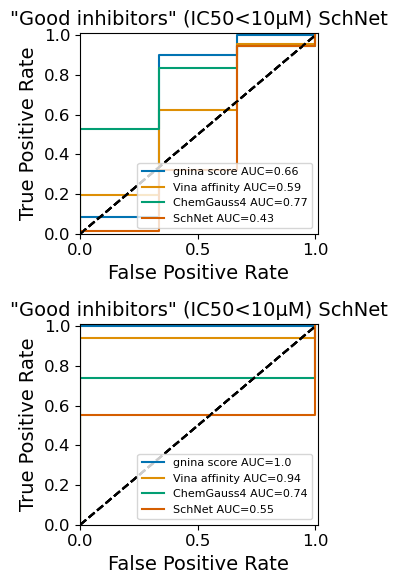

In [121]:
fig, axs = plt.subplots(2, 1, figsize=(3.5, 6))

labels = ['gnina score', 'Vina affinity', 'ChemGauss4', 'SchNet']
cols = ['Gnina', 'AutoDock Vina', 'ChemGauss4', 'SchNet']
colors = list(sns.color_palette("colorblind"))
title = lambda x: f'"Good inhibitors" (IC50<10µM)'
for label, col, color in zip(labels, cols, colors):
    ax = get_roc_curve(axs[0], df_mers_aff_pred[col], df_mers_aff_pred['pIC50']>5, pred_type=label, title=title(30), n_bootstraps=500, color=color, box=False, legend=True)
    ax = get_roc_curve(axs[1], df_sars_aff_pred[col], df_sars_aff_pred['pIC50']>5, pred_type=label, title=title(30), n_bootstraps=500, color=color, box=False, legend=True)
    #ax1 = get_roc_curve(axs[0], df_mers_aff_pred['ChemGauss4'], df_mers_aff_pred['pIC50']>5, pred_type='ChemGauss4', title=title(30), n_bootstraps=100, color='#78a37cff', box=False)
    #ax1 = get_roc_curve(axs[0], df_mers_aff_pred['AutoDock Vina'], df_mers_aff_pred['pIC50']>5, pred_type='Vina affinity', title=title(50), n_bootstraps=100, color="#c4917aff", box=False)
    #ax1 = get_roc_curve(axs[0], df_mers_aff_pred['Gnina'], df_mers_aff_pred['pIC50']>5,  pred_type='gnina score', title=title(50), n_bootstraps=100, color="#1f6bb4ff", box=False)
    # ax1 = get_roc_curve(axs, df_mers_aff_pred['GAT'], df_mers_aff_pred['pIC50']>5,  pred_type='GAT', title=title(50), n_bootstraps=100, color="red")
axs[0].legend(loc='lower right', fontsize=8)
axs[1].legend(loc='lower right', fontsize=8)
plt.tight_layout()


fig.savefig("/Users/castelm3/Documents/Github/asapdiscovery_orig/local/sars_mers_gen_validation/ROC_ltransfer.pdf", bbox_inches='tight')

In [113]:
len(np.unique(mers_pred['lig-ID'])), len(np.unique(sars_pred['lig-ID']))

(78, 149)

### MERS-CoV results

We predicted 321/351 binders from experiment, out of which 304 are also predicted from theory


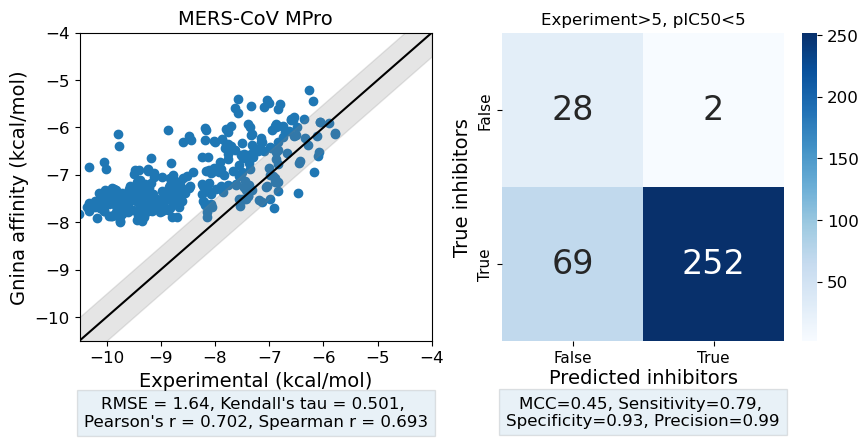

In [91]:
mers_pred_c = mers_pred.copy()
mers_pred_c['CNN_dock_affinity'] = mers_pred_c['CNN_dock_affinity'].apply(lambda x: -x if x > 0 else x)
aff_df, fig, a, b = plot_affinity_compare(mers_ic50,
                                          mers_pred_c,
                                          target='MERS-CoV MPro',                                        
                                          ic50_col='Minh pIC50',
                                          score_col='CNN_dock_affinity',
                                          binder_cond=5,
                                          prange=[-10.5,-4.],
                                          yaxis="Gnina affinity (kcal/mol)",
                                          label_pad=-12.3,
                                          classif_plot='conf-matrix',
                                          )
fig.savefig("/Users/castelm3/Documents/Github/asapdiscovery_orig/local/sars_mers_gen_validation/conf_mat_mers_docking.pdf", bbox_inches='tight')

AUC is 0.86, with bootstrap-sampling is 0.863+/-0.037
95% Confidence Interval: [0.78, 0.92]
We predicted 320/349 binders from experiment, out of which 304 are also predicted from theory


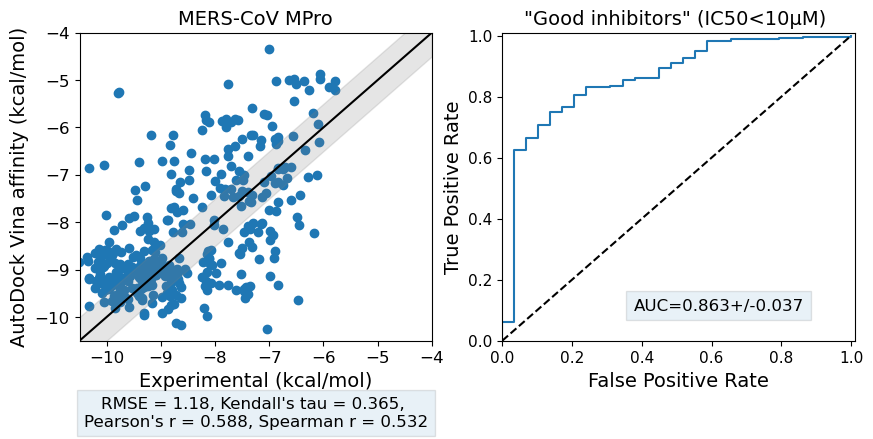

In [60]:
aff_df, fig, a, b = plot_affinity_compare(mers_ic50,
                                          mers_pred,
                                          target='MERS-CoV MPro',                                        
                                          ic50_col='Minh pIC50',
                                          score_col='Vina-score-premin',
                                          binder_cond=5,
                                          prange=[-10.5,-4.],
                                          yaxis="AutoDock Vina affinity (kcal/mol)",
                                          label_pad=-12.3,
                                          classif_plot='roc-curve',
                                          )

AUC is 0.91, with bootstrap-sampling is 0.91+/-0.022
95% Confidence Interval: [0.87, 0.95]
We predicted 321/351 binders from experiment, out of which 304 are also predicted from theory


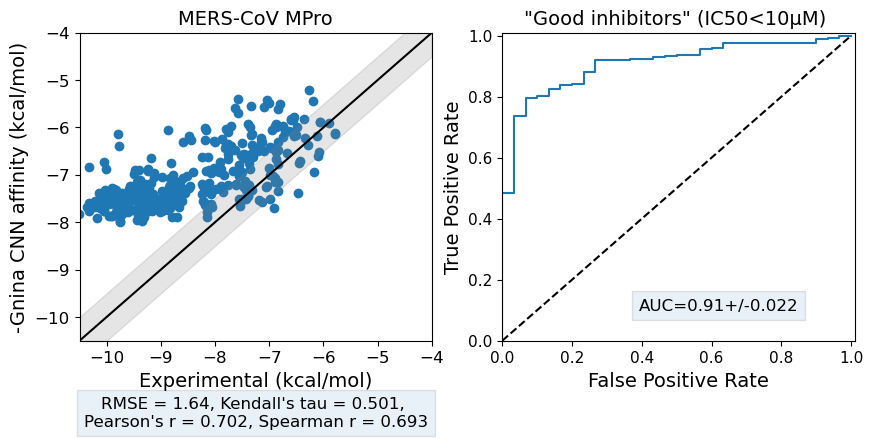

In [62]:
mers_pred_mod = mers_pred.copy()
mers_pred_mod['CNN_dock_affinity'] = mers_pred_mod['CNN_dock_affinity'].apply(lambda x: -x)
aff_df, fig, a, b = plot_affinity_compare(mers_ic50,
                                          mers_pred_mod,
                                          target='MERS-CoV MPro',                                        
                                          ic50_col='Minh pIC50',
                                          score_col='CNN_dock_affinity',
                                          binder_cond=5,
                                          prange=[-10.5,-4.],
                                          yaxis="-Gnina CNN affinity (kcal/mol)",
                                          label_pad=-12.3,
                                          classif_plot='roc-curve',
                                          )

### SARS-CoV-2 results

We predicted 636/1002 binders from experiment, out of which 463 are also predicted from theory


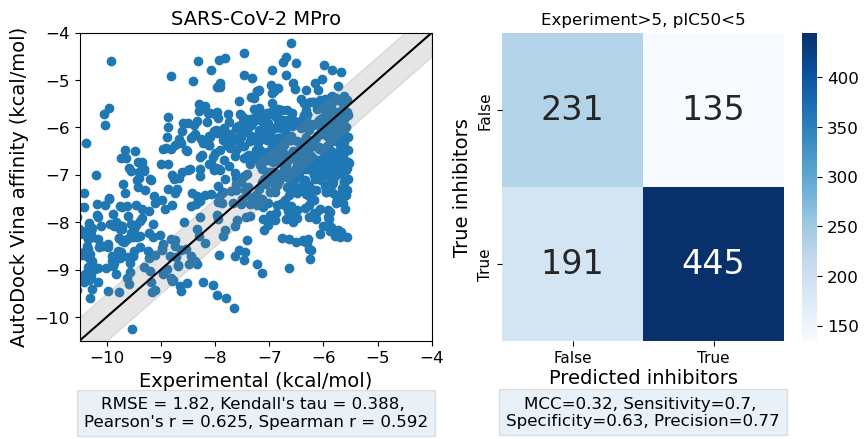

In [ ]:
aff_df, fig, a, b = plot_affinity_compare(sars_ic50,
                                          sars_pred,
                                          target='SARS-CoV-2 MPro',                                        
                                          ic50_col='IC50 lower (µM)',
                                          score_col='Vina-score-premin',
                                          binder_cond=5,
                                          prange=[-10.5,-4.],
                                          yaxis="AutoDock Vina affinity (kcal/mol)",
                                          label_pad=-12.3,
                                          classif_plot='conf-matrix',
                                          )

AUC is 0.74, with bootstrap-sampling is 0.736+/-0.016
95% Confidence Interval: [0.71, 0.77]
We predicted 636/1002 binders from experiment, out of which 463 are also predicted from theory


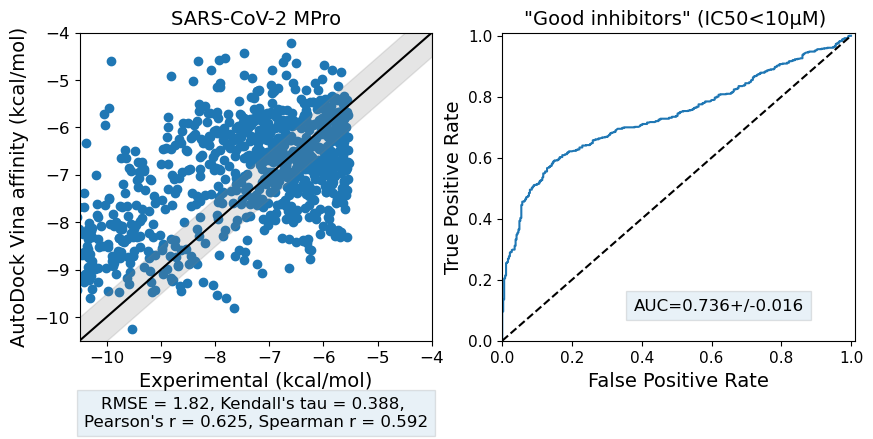

In [ ]:
sars_pred_mod = sars_pred.copy()
sars_pred_mod['CNN_dock_affinity'] = sars_pred_mod['CNN_dock_affinity'].apply(lambda x: -x)
aff_df, fig, a, b = plot_affinity_compare(sars_ic50,
                                          sars_pred_mod,
                                          target='SARS-CoV-2 MPro',                                        
                                          ic50_col='IC50 lower (µM)',
                                          score_col='Vina-score-premin',
                                          binder_cond=5,
                                          prange=[-10.5,-4.],
                                          yaxis="AutoDock Vina affinity (kcal/mol)",
                                          label_pad=-12.3,
                                          classif_plot='roc-curve',
                                          )

We predicted 638/1004 binders from experiment, out of which 490 are also predicted from theory


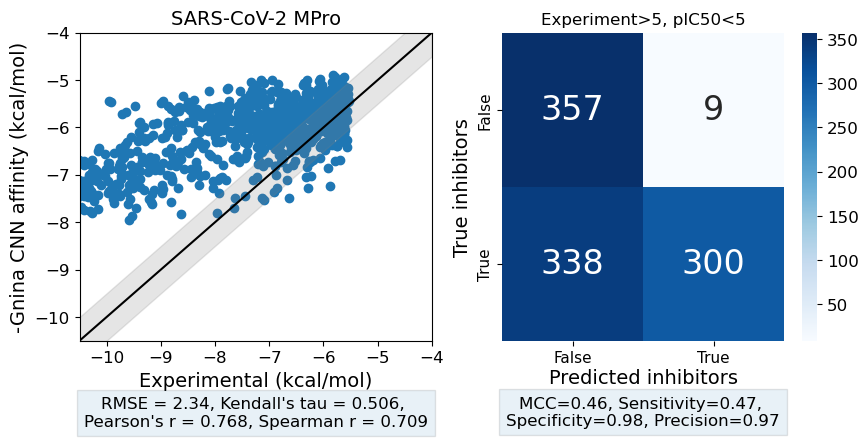

In [102]:
aff_df, fig, a, b = plot_affinity_compare(sars_ic50,
                                          sars_pred_mod,
                                          target='SARS-CoV-2 MPro',                                        
                                          ic50_col='IC50 lower (µM)',
                                          score_col='CNN_dock_affinity',
                                          binder_cond=5,
                                          prange=[-10.5,-4.],
                                          yaxis="-Gnina CNN affinity (kcal/mol)",
                                          label_pad=-12.3,
                                          classif_plot='conf-matrix',
                                          )
fig.savefig("/Users/castelm3/Documents/Github/asapdiscovery_orig/local/sars_mers_gen_validation/conf_mat_sars_docking.pdf", bbox_inches='tight')

### RMSD plots

In [155]:
from pathlib import Path
local_dir = Path("/Users/castelm3/Documents/Github/asapdiscovery_orig/local")
sars_rmsd = pd.read_csv("data/sars_rmsd.csv")
mers_rmsd = pd.read_csv("data/mers_rmsd.csv")

In [177]:
values = sars_rmsd['Lig-RMSD_premin'].round(1).values
counts = np.sum((values < 2.0) & (values > 0.0)) 
total = len(values)
weights = 100*counts/total 
weights

78.04878048780488

In [175]:
values

array([1.2, 0.6, 0.5, 0.8, 1.1, 1.3, 0.7, 0.5, 1. , 2.1, 2.1, 2.7, 0.8,
       1. , 1.1, 0.8, 0.8, 2. , 0.5, 2.6, 1.2, 1. , 2.1, 1.6, 2.8, 1.6,
       0.5, 1.1, 1. , 1.4, 2.4, 3. , 2.2, 0.7, 0.8, 1.3, 1.3, 0.8, 1.7,
       0.7, 2.2, 0.9])

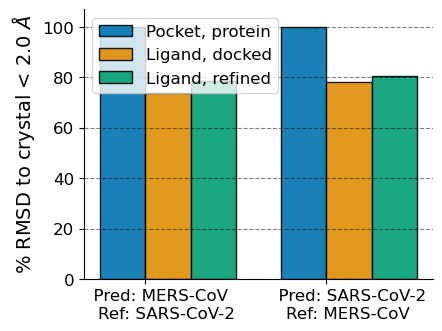

In [162]:
from scripts.plot_results import stacked_bars
rmsd_dict = {
    "Pocket, protein": [mers_rmsd['Bsite-RMSD_AFold'].values, sars_rmsd['Bsite-RMSD_AFold'].values],
    "Ligand, docked": [mers_rmsd['Lig-RMSD_premin'].round(1).values, sars_rmsd['Lig-RMSD_premin'].round(1).values],
    "Ligand, refined": [mers_rmsd['Lig-RMSD_min'].round(1).values, sars_rmsd['Lig-RMSD_min'].round(1).values],
}
fig, ax = stacked_bars(
    bar_dict = rmsd_dict,
    xlabels = ['      Pred: MERS-CoV\n        Ref: SARS-CoV-2',
                        '          Pred: SARS-CoV-2\n        Ref: MERS-CoV' ],
    ylabel=r"% RMSD to crystal < 2.0 $\AA$", 
    width = 0.25,
    grid = True,
    fsize=(4.5, 3.5),
    color_palette = "colorblind",
    threshold = 2.0,
)
fig.savefig(local_dir/"sars_mers_gen_validation/rmsd_stacked_bars.pdf", bbox_inches='tight')

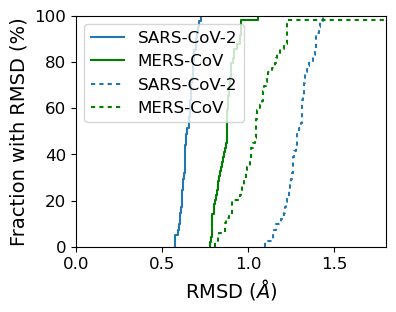

In [125]:
sars_af_rmsd = sars_rmsd[sars_rmsd['Bsite-RMSD_AFold'] > 0]
mers_af_rmsd = mers_rmsd[mers_rmsd['Bsite-RMSD_AFold'] > 0]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3.))
sns.ecdfplot(sars_af_rmsd, x='prot-RMSD_AFold', label='SARS-CoV-2', color="tab:blue", stat='percent')
sns.ecdfplot(mers_af_rmsd, x='prot-RMSD_AFold', label='MERS-CoV', color="green", stat='percent')

sns.ecdfplot(sars_af_rmsd, x='Bsite-RMSD_AFold',  label='SARS-CoV-2', color="tab:blue", stat='percent', dashes=(2, 2))
sns.ecdfplot(mers_af_rmsd, x='Bsite-RMSD_AFold', label='MERS-CoV', color="green", stat='percent', dashes=(2, 2))

#sns.ecdfplot(sars_af_rmsd, x='Bsite-RMSD_min', color="tab:blue", stat='percent', dashes=(2, 1, 2))
#sns.ecdfplot(mers_af_rmsd, x='Bsite-RMSD_min', color="green", stat='percent', dashes=(2, 1, 2))

ax.set_xlabel(r'RMSD ($\AA$)', fontsize=14)
ax.set_ylabel("Fraction with RMSD (%)", fontsize=14)
ax.set_xlim(0., 1.8)
ax.set_ylim(0., 100)
ax.legend(loc="best")

#ax.grid(which='major', axis='y', linestyle='--', c='black', alpha=0.5)
ax.axvline(x = 2.0, color = 'r', ls='--', lw=0.7, dashes=[4, 2])

fig.savefig(local_dir/"sars_mers_gen_validation/af_rmsd_cdf.pdf", bbox_inches='tight')

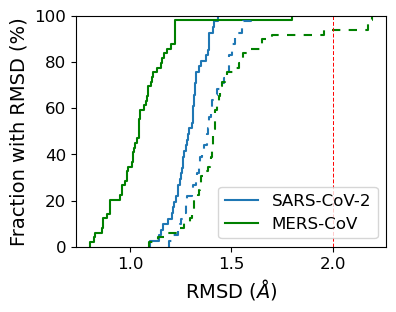

In [126]:
sars_af_rmsd = sars_rmsd[sars_rmsd['Bsite-RMSD_AFold'] > 0]
mers_af_rmsd = mers_rmsd[mers_rmsd['Bsite-RMSD_AFold'] > 0]

sars_af_rmsd = sars_rmsd[sars_rmsd['Bsite-RMSD_min'] > 0]
mers_af_rmsd = mers_rmsd[mers_rmsd['Bsite-RMSD_min'] > 0]

sars_af_rmsd = sars_rmsd[sars_rmsd['Bsite-RMSD_premin'] > 0]
mers_af_rmsd = mers_rmsd[mers_rmsd['Bsite-RMSD_premin'] > 0]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3.))
sns.ecdfplot(sars_af_rmsd, x='Bsite-RMSD_AFold', label='SARS-CoV-2', color="tab:blue", stat='percent')
sns.ecdfplot(mers_af_rmsd, x='Bsite-RMSD_AFold', label='MERS-CoV', color="green", stat='percent')

#sns.ecdfplot(sars_af_rmsd, x='Bsite-RMSD_premin', color="tab:blue", stat='percent', dashes=(4, 4))
#sns.ecdfplot(mers_af_rmsd, x='Bsite-RMSD_premin', color="green", stat='percent', dashes=(4, 4))

sns.ecdfplot(sars_af_rmsd, x='Bsite-RMSD_min', color="tab:blue", stat='percent', dashes=(4, 4))
sns.ecdfplot(mers_af_rmsd, x='Bsite-RMSD_min', color="green", stat='percent', dashes=(4, 4))

ax.set_xlabel(r'RMSD ($\AA$)', fontsize=14)
ax.set_ylabel("Fraction with RMSD (%)", fontsize=14)
#ax.set_xlim(0., 1.4)
ax.set_ylim(0., 100)
ax.legend(loc="best")

#ax.grid(which='major', axis='y', linestyle='--', c='black', alpha=0.5)
ax.axvline(x = 2.0, color = 'r', ls='--', lw=0.7, dashes=[4, 2])